Streamimg platform analysis

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importing dataset

In [2]:
#importing dataset
data=pd.read_csv('D:\\Msc Data Science\\tv_shows.csv')
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


Cleaning and processing data

In [3]:
#remove unnecessary column 'type'
data=data.drop(['Unnamed: 0','type'],axis=1)

In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   Year             5611 non-null   int64  
 2   Age              3165 non-null   object 
 3   IMDb             4450 non-null   float64
 4   Rotten Tomatoes  1011 non-null   object 
 5   Netflix          5611 non-null   int64  
 6   Hulu             5611 non-null   int64  
 7   Prime Video      5611 non-null   int64  
 8   Disney+          5611 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 394.6+ KB


None

In [5]:
#removing duplicates
duplicate=data.duplicated(subset='Title',keep=False)
duplicate_value=data[duplicate].sort_values('Title')
display(duplicate_value.head(20))

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
3119,Abandoned,2012,NaN,NaN,NaN,0,1,0,0
2804,Abandoned,2016,16+,8.4,NaN,0,1,0,0
2580,American Gladiators,1989,7+,6.5,NaN,0,1,0,0
3044,American Gladiators,2008,NaN,5.6,NaN,0,1,0,0
3776,American Gothic,2016,16+,6.7,58%,0,0,1,0
2271,American Gothic,1995,7+,8.1,67%,0,1,0,0
2226,Baby Daddy,2012,16+,7.3,NaN,0,1,0,0
1370,Baby Daddy,2015,16+,6.0,78%,1,0,0,0
4397,Baby Talk,1991,all,4.2,NaN,0,0,1,0
5235,Baby Talk,2017,NaN,NaN,NaN,0,0,1,0


In [6]:
#checking if any duplicatevalues
dupe=data.duplicated()
dupe.sum()

0

Exploring Data

In [7]:
#total number of movies each platform has
num_netflix=data['Netflix'].sum()
num_hulu=data['Hulu'].sum()
num_prime=data['Prime Video'].sum()
num_disney=data['Disney+'].sum()

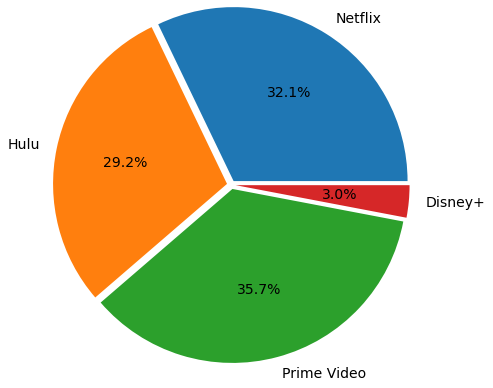

 Netflix offers 1931 tv-shows
 Hulu offers 1754 tv-shows
 Prime offers 2144 tv-shows
 Disney+ offers 180 tv-shows


In [8]:
market_shares=[num_netflix,num_hulu,num_prime,num_disney]
labels=('Netflix','Hulu','Prime Video','Disney+')
sep=(0.05,0.05,0.05,0.05)
fig,ax=plt.subplots()
ax.pie(market_shares,
      explode=sep,
      labels=labels,
      autopct='%.1f%%',
      radius=2,
      textprops={'fontsize':14})

plt.show()

print(' Netflix offers ' + str(num_netflix) + ' tv-shows')
print(' Hulu offers ' + str(num_hulu) + ' tv-shows')
print(' Prime offers ' + str(num_prime) + ' tv-shows')
print(' Disney+ offers ' + str(num_disney) + ' tv-shows')

Prime offers largest quantity of tv-shows,followed by hulu and netflix and disney has significantly less tv-shows than the competitors with only 180 shows

In [9]:
netflix_shows=data.loc[data['Netflix'] == 1].drop(['Hulu','Prime Video','Disney+'],axis=1)
hulu_shows=data.loc[data['Hulu'] == 1].drop(['Netflix','Prime Video','Disney+'],axis=1)
prime_shows=data.loc[data['Prime Video'] == 1].drop(['Netflix','Hulu','Disney+'],axis=1)
disney_shows=data.loc[data['Disney+'] == 1].drop(['Hulu','Prime Video','Netflix'],axis=1)

In [10]:
top_netflix_shows=netflix_shows['IMDb'] > 8
top_hulu_shows=hulu_shows['IMDb'] > 8
top_prime_shows=prime_shows['IMDb'] > 8
top_disney_shows=disney_shows['IMDb'] > 8
 
top_rated_shows=pd.DataFrame({
    'Platforms':['Netflix',
                'Hulu',
                'Prime Video',
                'Disney'],
    'Total highly rated shows' :[top_netflix_shows.sum(),
                                 top_hulu_shows.sum(),
                                 top_prime_shows.sum(),
                                 top_disney_shows.sum()]})

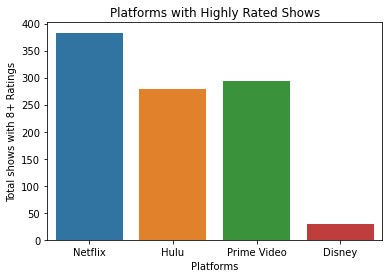

,Total highly rated shows
Platforms,
Netflix,383
Hulu,279
Prime Video,293
Disney,30


In [11]:
sns.barplot(x=top_rated_shows['Platforms'],
           y=top_rated_shows['Total highly rated shows'],
           data=top_rated_shows)
plt.xlabel('Platforms')
plt.ylabel('Total shows with 8+ Ratings')
plt.title('Platforms with Highly Rated Shows')
plt.show()

top_rated_shows = top_rated_shows.set_index('Platforms')
display(top_rated_shows)

Netflix reign supreme in the sense of having access to the most highly rated tv-shows, 
followed by Prime and Hulu who are nearly equal, and 
to no surprise Disney have significantly the least number of highly rated tv-shows.

<Figure size 576x576 with 0 Axes>

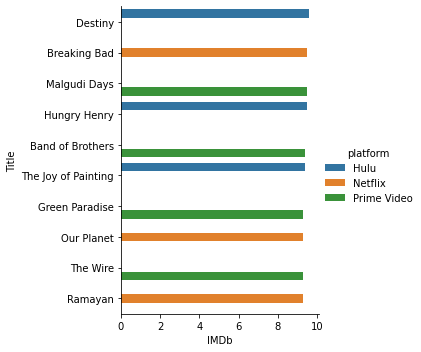

In [12]:
data['platform'] = data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].idxmax(axis=1)

overall_top_10 = data.sort_values(by='IMDb', ascending=False).head(10)

plt.figure(figsize=(8,8))
sns.catplot(x='IMDb', y='Title', data=overall_top_10,hue='platform', kind='bar')
plt.show()

Hulu have access to 'Destiny' which is the highest rated show available across the platforms, however Prime Video have access to 4/10 of the highest rated shows, suggesting they are the optimal choice.

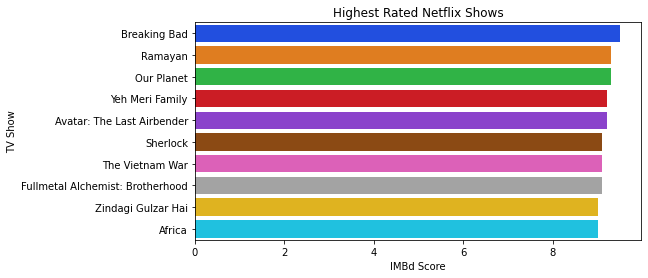

In [13]:
#Best tv-shows 
netflix_top_10=netflix_shows.sort_values(by='IMDb',ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x='IMDb',y='Title',data=netflix_top_10,palette='bright')
plt.xlabel('IMBd Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Netflix Shows')
plt.show()

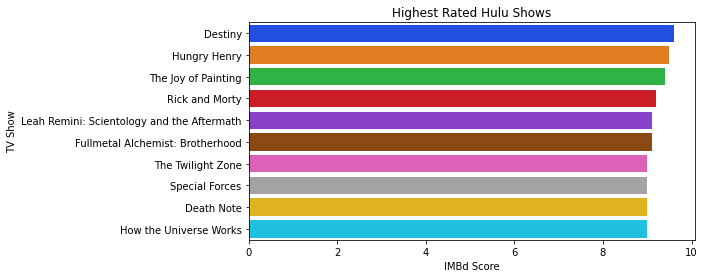

In [14]:
hulu_top_10=hulu_shows.sort_values(by='IMDb',ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x='IMDb',y='Title',data=hulu_top_10,palette='bright')
plt.xlabel('IMBd Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Hulu Shows')
plt.show()

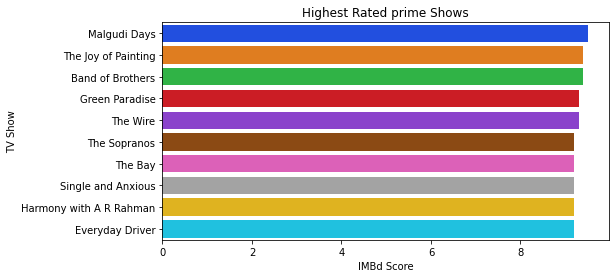

In [15]:
prime_top_10=prime_shows.sort_values(by='IMDb',ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x='IMDb',y='Title',data=prime_top_10,palette='bright')
plt.xlabel('IMBd Score')
plt.ylabel('TV Show')
plt.title('Highest Rated prime Shows')
plt.show()

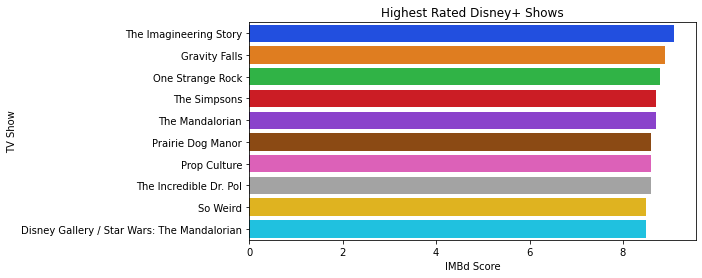

In [16]:
disney_top_10=disney_shows.sort_values(by='IMDb',ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x='IMDb',y='Title',data=disney_top_10,palette='bright')
plt.xlabel('IMBd Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Disney+ Shows')
plt.show()

On inspection, consumers can form opinions on who to subscribe to based on which shows they are meaning to watch.

In [17]:
#which are the age groups
print(data.Age.unique())

['18+' '16+' '7+' nan 'all' '13+']


In [18]:
netflix_child=netflix_shows[netflix_shows['Age'] == 'all']
hulu_child=hulu_shows[hulu_shows['Age'] == 'all']
prime_child=prime_shows[prime_shows['Age'] == 'all']
disney_child=disney_shows[disney_shows['Age'] == 'all']

netflix1=len(netflix_child['Title'])
hulu1=len(hulu_child['Title'])
prime1=len(prime_child['Title'])
disney1=len(disney_child['Title'])

children_sum=({
    'platforms' : ['Netflix',
                 'Hulu',
                 'Prime Video',
                 'Disney'],
    'sums':[netflix1,hulu1,prime1,disney1]
})

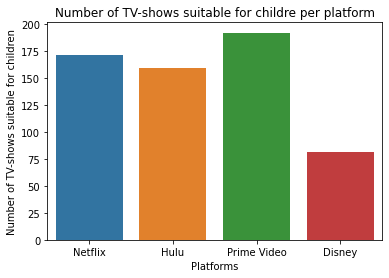

Netflix has 171 tv-shows for children
Hulu has 159 tv-shows for children
Prime has 192 tv-shows for children
Disney+ has 81 tv-shows for children


In [22]:
sns.barplot(x=children_sum['platforms'],
           y=children_sum['sums'])
plt.xlabel('Platforms')
plt.ylabel('Number of TV-shows suitable for children')
plt.title('Number of TV-shows suitable for childre per platform')
plt.show()

print('Netflix has ' + str(netflix1) + ' tv-shows for children')
print('Hulu has ' + str(hulu1) + ' tv-shows for children')
print('Prime has ' + str(prime1) + ' tv-shows for children')
print('Disney+ has ' + str(disney1) + ' tv-shows for children')

Prime has the most tv-shows suitable for children, but what about concentration of tv-shows for children, as the platform with the highest concentration is likely to be much more tailored towards children and have tv-shows that are made specifically for children

In [20]:
ratio1_netflix=netflix1/num_netflix
ratio1_hulu=hulu1/num_hulu
ratio1_prime=prime1/num_prime
ratio1_disney=disney1/num_disney

children_show_ratios=({
    'platforms' : ['Netflix',
                 'Hulu',
                 'Prime Video',
                 'Disney'],
    'ratios':[ratio1_netflix,ratio1_hulu,ratio1_prime,ratio1_disney]
})

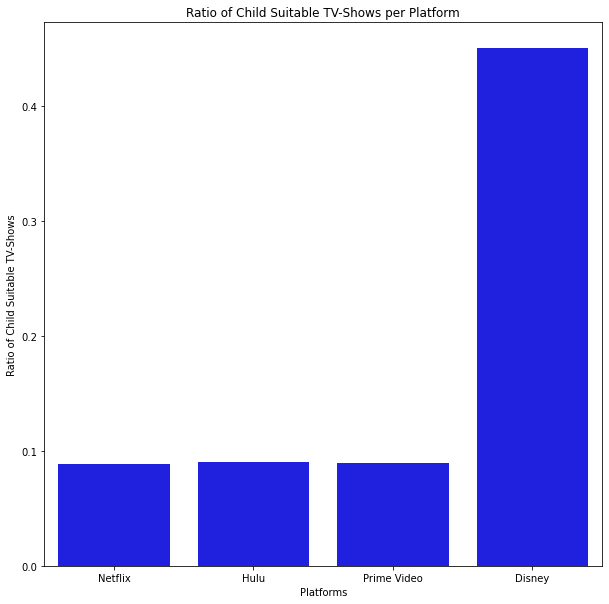

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x = children_show_ratios['platforms'],
           y = children_show_ratios['ratios'],
           color='blue')

plt.xlabel('Platforms')
plt.ylabel('Ratio of Child Suitable TV-Shows')
plt.title('Ratio of Child Suitable TV-Shows per Platform')

plt.show()

Evidently Disney+ is much more child-friendly than the 3 alternatives, with a 4-fold greater difference in the ratio of child-friendly tv-shows on Disney+ in comparison.

Conclusion: Although Prime offer the largest number of tv-shows, if you prioritise quality over quantity then Netflix is the optimal choice with the most and highly concentrated number of highly rated TV shows. On the other hand, if you are satisfying the needs of your children then Disney+ is a tremendous subscription as it is heavily tailored towards children.